<h1><center>Ciência dos Dados - PROJETO 1</center></h1>
<h2><center>Gabriella Escobar Cukier</center></h2>


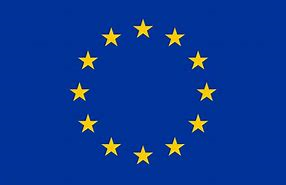

<h1><center>União Europeia</center></h1>




Considerado um dos mais importantes blocos econômicso do mundo, a União Europeia é formada por 28 países. Entre eles, há ivre circulação de bens, mercadorias e pessoas e o uso de uma moeda única.



## Pergunta (s) a ser respondida
### Como a entrada na União Europeia afeta o desemprego em um país?

## Explicação da hipótese e mecanismo

Segundo o artigo "The EU Single Market: Impact on Member States", conduzido pela LE Europe, a União Europeia é um bloco econômico com um grande nível de integração. Isso traz consequências benéficas como melhorias econômicas e em índices internos da qualidade de vida de cada país.
É o caso da Polônia, como mostrado no artigo "POLAND IN THE EUROPEAN UNION. TEN YEARS OF MEMBERSHIP", da Universidade de Varsóvia. Ele estuda as consequências econômicas da entrada da Polônia na União Europeia.
Segundo o estudo, a entrada no bloco econômico causou um significativo aumento das exportações, devido ao acordo de livre circulação de mercadorias. Como consequência, a economia do pais melhorou.
Levando em conta tais transformações no cenário econômico, este trabalho visa estudar como a entrada de um país na União Europeia afeta seu nível de desemprego.
Também serão analisadas alguns fatores relevantes para a mudança deste indíce, dentre eles o crescimento do GDP, o nível de exportações e os investimentos internos em infraestrutura do país.

Referências dos artigos: http://www.amchameu.eu/sites/default/files/amcham_eu_single_market_web.pdf ; https://www.ucm.es/data/cont/media/www/pag-78913/UNISCIDP40-1Katarzyna%20K.pdf

## Bases de dados usadas

Os dados usados foram retirados do site GapMinder (https://www.gapminder.org/data/). Os seguintes índices serão estudados: IDH, GDP per capita, desemprego (pessoas com mais de 15 anos), exportações (% do GDP), crescimento anual do GDP, investimentos internos (% do GDP).

## Análise de dados

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
# acesso aos dataframes
idh = pd.read_excel('idh.xlsx')
gdp= pd.read_excel('gdp_capta.xlsx')
unemployment=pd.read_excel('unemployment.xlsx')
investimento=pd.read_excel('inestimentos.xlsx')
dGDP=pd.read_excel('aumento_GDP.xlsx')
exportacao=pd.read_excel('exportacao.xlsx')


Para filtrar os países que fazem parte da União Europeia, foi usada uma variável qualitativa, em que 0 indica o não pertencimento e 1 o pertencimento ao bloco em questão

In [5]:
europa = pd.read_excel('paises_UE.xlsx')
europa.head()

,country,EU,selecao
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,Andorra,0,2
4,Angola,0,0


In [6]:
europa['EU'].value_counts()

0    159
1     28
Name: EU, dtype: int64

## Escolha dos países a serem analisados

Oficialmente, a União Europeia foi fundada em 1992, mas sua formação fundamentou-se em um longo processo atrelado a acordos intergovernamentais anteriores.
O número de países membros foi aumentando ao longo dos anos. Em 2004 ocorreu a entrada no bloco com o maior número de membros. Por esse motivo, o ano em questão, assim como os países que participaram dessa adesão foram  selecionados como base para uma análise mais aprofundada das consequências da entrada no bloco.


Os países que entraram no ano de 2004 foram: Estónia, Letónia, Lituânia, Chipre, Malta, Polónia, República Checa, Hungria e Eslováquia e Eslovênia.

O objetivo do projeto é estudar o efeito da entrada no bloco ecoômico em questão. Assim, é importante comparar os dados com aqueles de outros países. Para uma melhor comparação, serão escolhidos países não pertencentes ao bloco que possuem um nível socioeconômico semelhante. Para isso, será levado em conta o IDH e GDP per capita.

In [7]:
europa['GDP']=gdp.loc[:,[(2015)]]

In [8]:
europa['IDH']=idh.loc[:,[(2015)]]
europa.head()

,country,EU,selecao,GDP,IDH
0,Afghanistan,0,0,1750,0.479
1,Albania,0,0,11000,0.764
2,Algeria,0,0,13700,0.745
3,Andorra,0,2,46600,0.858
4,Angola,0,0,6230,0.533


Para facilitar a comparação destas variáveis qualitativas de diferentes países, foram estabelecidas faixas de valores

In [9]:
faixasIDH= europa.loc[:,'IDH']
faixasIDH

europa['Faixas_IDH'] = pd.cut(faixasIDH, bins=20)

faixasGDP=europa.loc[:,'GDP']
europa['Faixas_GDP']=  pd.cut(faixasGDP, bins=20)
europa.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
0,Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
1,Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
2,Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
4,Angola,0,0,6230,0.533,"(0.531, 0.561]","(503.623, 6591.85]"


In [10]:
df=europa[europa['EU']==1]
df.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
9,Austria,1,0,44100,0.893,"(0.889, 0.919]","(42404.95, 48373.8]"
16,Belgium,1,0,41700,0.896,"(0.889, 0.919]","(36436.1, 42404.95]"
25,Bulgaria,1,0,17000,0.794,"(0.77, 0.8]","(12560.7, 18529.55]"
42,Croatia,1,0,20600,0.827,"(0.8, 0.83]","(18529.55, 24498.4]"
44,Cyprus,1,1,30400,0.856,"(0.83, 0.859]","(24498.4, 30467.25]"


In [11]:
mundo=europa[europa['EU']==0]
mundo.head()

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
0,Afghanistan,0,0,1750,0.479,"(0.471, 0.501]","(503.623, 6591.85]"
1,Albania,0,0,11000,0.764,"(0.74, 0.77]","(6591.85, 12560.7]"
2,Algeria,0,0,13700,0.745,"(0.74, 0.77]","(12560.7, 18529.55]"
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
4,Angola,0,0,6230,0.533,"(0.531, 0.561]","(503.623, 6591.85]"


In [12]:
df['Faixas_GDP'].value_counts()

(24498.4, 30467.25]      6
(6591.85, 12560.7]       4
(18529.55, 24498.4]      4
(12560.7, 18529.55]      3
(36436.1, 42404.95]      3
(42404.95, 48373.8]      3
(503.623, 6591.85]       2
(90155.75, 96124.6]      1
(30467.25, 36436.1]      1
(60311.5, 66280.35]      1
(48373.8, 54342.65]      0
(114031.15, 120000.0]    0
(108062.3, 114031.15]    0
(66280.35, 72249.2]      0
(72249.2, 78218.05]      0
(78218.05, 84186.9]      0
(84186.9, 90155.75]      0
(96124.6, 102093.45]     0
(102093.45, 108062.3]    0
(54342.65, 60311.5]      0
Name: Faixas_GDP, dtype: int64

In [13]:
df['Faixas_IDH'].value_counts()

(0.83, 0.859]     8
(0.889, 0.919]    8
(0.859, 0.889]    5
(0.919, 0.949]    4
(0.8, 0.83]       2
(0.77, 0.8]       1
(0.531, 0.561]    0
(0.382, 0.412]    0
(0.412, 0.442]    0
(0.442, 0.471]    0
(0.471, 0.501]    0
(0.501, 0.531]    0
(0.621, 0.65]     0
(0.561, 0.591]    0
(0.591, 0.621]    0
(0.65, 0.68]      0
(0.68, 0.71]      0
(0.71, 0.74]      0
(0.74, 0.77]      0
(0.351, 0.382]    0
Name: Faixas_IDH, dtype: int64

Para a comparação com outros países, foram escolhidas as faixas  de valores que continham mais países da União Europeia

In [14]:
comparacao = mundo[((mundo['IDH']>0.83)) & ((mundo['GDP']>24498))]
comparacao

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
3,Andorra,0,2,46600,0.858,"(0.83, 0.859]","(42404.95, 48373.8]"
8,Australia,0,2,43800,0.939,"(0.919, 0.949]","(42404.95, 48373.8]"
24,Brunei,0,2,74600,0.865,"(0.859, 0.889]","(72249.2, 78218.05]"
30,Canada,0,2,43000,0.920,"(0.919, 0.949]","(42404.95, 48373.8]"
74,Iceland,0,2,42700,0.921,"(0.919, 0.949]","(42404.95, 48373.8]"
80,Israel,0,2,32000,0.899,"(0.889, 0.919]","(30467.25, 36436.1]"
83,Japan,0,2,37800,0.903,"(0.889, 0.919]","(36436.1, 42404.95]"
96,Liechtenstein,0,2,27000,0.912,"(0.889, 0.919]","(24498.4, 30467.25]"
151,South Korea,0,2,28300,0.901,"(0.889, 0.919]","(24498.4, 30467.25]"


Os Estados Unidos foram acrescentados ao dataframe por conta de seu reconhecimento internacional como um líder econômico mundial

In [15]:
mundo[mundo['country']=='United States']

,country,EU,selecao,GDP,IDH,Faixas_IDH,Faixas_GDP
178,United States,0,2,15000,0.92,"(0.919, 0.949]","(12560.7, 18529.55]"


Uma variável qualitativa foi acrescentada para selecionar os países filtrados acima. O número 0 indica aqueles países que a análise não levará em conta. 1 representa os que aderiram a União Europeia em 2004. 2 refere-se aos países que serão comparados no estudo

# Análise temporal

### Seleção dos dados

A entrada dos países analisados no bloco ocorreu em 2004. Foi escolhido o período entre 2000 e 2008 para a análise, considerando que nesse intervalo de tempo seria possível obter uma perspectiva dos índices antes da aderência ao bloco e a mudança nos anos que sucederam a entrada.

### Índices de desemprego

In [16]:
analise = unemployment.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
analise.head()

,2000,2002,2004,2006,2008
0,NaN,NaN,NaN,NaN,2.49
1,NaN,NaN,NaN,NaN,13.10
2,29.8,25.9,17.6,12.3,11.30
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [17]:
paises2= pd.read_excel('paises_UE.xlsx')

analisePaises=paises2.join(analise, lsuffix='', rsuffix='')
analisePaises.tail()

,country,EU,selecao,2000,2002,2004,2006,2008
182,Venezuela,0,0,2.26,2.12,2.14,NaN,2.38
183,Vietnam,0,0,NaN,NaN,NaN,NaN,NaN
184,Yemen,0,0,NaN,NaN,NaN,NaN,7.93
185,Zambia,0,0,NaN,NaN,4.39,NaN,NaN
186,Zimbabwe,0,0,NaN,NaN,NaN,NaN,NaN


In [18]:
analiseUE=analisePaises[analisePaises['selecao']==1]
analiseUE

,country,EU,selecao,2000,2002,2004,2006,2008
44,Cyprus,1,1,4.48,4.27,5.20,3.90,3.43
45,Czech Republic,1,1,NaN,NaN,NaN,NaN,NaN
55,Estonia,1,1,10.20,8.70,8.91,8.45,7.06
73,Hungary,1,1,NaN,NaN,NaN,NaN,NaN
91,Latvia,1,1,1.27,1.45,2.40,2.46,NaN
97,Lithuania,1,1,3.00,3.48,3.54,3.32,3.34
105,Malta,1,1,8.46,6.80,8.17,7.38,3.98
133,Poland,1,1,6.97,8.11,7.72,7.27,5.79
147,Slovak Republic,1,1,NaN,NaN,NaN,NaN,NaN
148,Slovenia,1,1,30.20,33.50,29.60,28.50,22.40


In [19]:
analiseOutros=analisePaises[analisePaises['selecao']==2]
analiseOutros

,country,EU,selecao,2000,2002,2004,2006,2008
3,Andorra,0,2,NaN,NaN,NaN,NaN,NaN
8,Australia,0,2,4.69,4.85,5.83,5.24,4.13
24,Brunei,0,2,16.20,18.10,12.00,8.95,5.61
30,Canada,0,2,NaN,NaN,NaN,NaN,NaN
74,Iceland,0,2,4.32,4.22,4.49,4.41,6.77
80,Israel,0,2,NaN,9.33,8.40,7.79,6.63
83,Japan,0,2,0.80,1.10,1.70,NaN,NaN
96,Liechtenstein,0,2,NaN,NaN,NaN,NaN,NaN
151,South Korea,0,2,13.80,11.10,11.10,8.45,11.30
178,United States,0,2,13.30,16.90,13.00,10.80,8.03


É possível observar nos dados das tabelas que alguns países, tanto da União Europeia como fora dela, não possuem dados suficientes referentes para análise à evolução do desemprego.
Por conta disso, optou-se por retirá-los da análise.
Esses países foram:
    Na europa:
        -República Checa
        -Hungária
        -Eslováquia
    Outros países:
        -Andorra
        -Canadá
        -Liechtenstein

In [20]:
analiseUE.iloc[[0,2,4,5,6,7,9]]


,country,EU,selecao,2000,2002,2004,2006,2008
44,Cyprus,1,1,4.48,4.27,5.20,3.90,3.43
55,Estonia,1,1,10.20,8.70,8.91,8.45,7.06
91,Latvia,1,1,1.27,1.45,2.40,2.46,NaN
97,Lithuania,1,1,3.00,3.48,3.54,3.32,3.34
105,Malta,1,1,8.46,6.80,8.17,7.38,3.98
133,Poland,1,1,6.97,8.11,7.72,7.27,5.79
148,Slovenia,1,1,30.20,33.50,29.60,28.50,22.40


In [21]:
analiseOutros.iloc[[1,2,4,5,6,8,9]]


,country,EU,selecao,2000,2002,2004,2006,2008
8,Australia,0,2,4.69,4.85,5.83,5.24,4.13
24,Brunei,0,2,16.20,18.10,12.00,8.95,5.61
74,Iceland,0,2,4.32,4.22,4.49,4.41,6.77
80,Israel,0,2,NaN,9.33,8.40,7.79,6.63
83,Japan,0,2,0.80,1.10,1.70,NaN,NaN
151,South Korea,0,2,13.80,11.10,11.10,8.45,11.30
178,United States,0,2,13.30,16.90,13.00,10.80,8.03


In [22]:
faixa=range(2,18,2)

eu2000= pd.cut(analiseUE[2000], faixa, False)
ue1=(eu2000.value_counts(True)*100).round(decimals=1)
eu2000.value_counts()


[10, 12)    1
[8, 10)     1
[6, 8)      1
[4, 6)      1
[2, 4)      1
[14, 16)    0
[12, 14)    0
Name: 2000, dtype: int64

### Índice de investimento interno

In [23]:
analise2 = investimento.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
analise2.head()

,2000,2002,2004,2006,2008
0,NaN,12.3,18.80,23.4,18.9
1,31.7,37.9,37.20,39.0,35.8
2,23.6,30.7,33.30,30.2,37.3
3,30.5,11.8,9.17,15.4,16.2
4,16.2,12.0,17.60,18.7,19.6


In [34]:
paises2= pd.read_excel('paises_UE.xlsx')

analisePaises2=paises2.join(analise2, lsuffix='', rsuffix='')
analisePaises2.head()

,country,EU,selecao,2000,2002,2004,2006,2008
0,Afghanistan,0,0,NaN,12.3,18.80,23.4,18.9
1,Albania,0,0,31.7,37.9,37.20,39.0,35.8
2,Algeria,0,0,23.6,30.7,33.30,30.2,37.3
3,Andorra,0,2,30.5,11.8,9.17,15.4,16.2
4,Angola,0,0,16.2,12.0,17.60,18.7,19.6


### Crescimento anual do GDP

In [36]:
analise3 = dGDP.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
analise3.head()

,2000,2002,2004,2006,2008
0,1.74,27.10,6.55,4.56,2.50
1,6.76,3.28,5.97,5.77,7.24
2,2.45,4.07,5.41,1.72,2.02
3,1.42,7.72,8.64,4.97,-4.22
4,3.01,14.50,11.20,18.60,13.80


In [37]:
analisePaises3=paises2.join(analise3, lsuffix='', rsuffix='')
analisePaises3.head()

,country,EU,selecao,2000,2002,2004,2006,2008
0,Afghanistan,0,0,1.74,27.10,6.55,4.56,2.50
1,Albania,0,0,6.76,3.28,5.97,5.77,7.24
2,Algeria,0,0,2.45,4.07,5.41,1.72,2.02
3,Andorra,0,2,1.42,7.72,8.64,4.97,-4.22
4,Angola,0,0,3.01,14.50,11.20,18.60,13.80


### Índice de exportação

In [38]:
analise4 = exportacao.loc[:,[(2000),(2002),(2004),(2006),(2008)]]
analise4.head()

,2000,2002,2004,2006,2008
0,NaN,32.4,34.0,26.5,18.0
1,17.9,19.6,22.0,24.9,25.3
2,42.1,35.5,40.1,48.8,48.0
3,89.7,68.3,70.3,79.8,76.3
4,56.2,52.5,58.1,47.4,45.7


In [39]:
analisePaises4=paises2.join(analise4, lsuffix='', rsuffix='')
analisePaises4.head()

,country,EU,selecao,2000,2002,2004,2006,2008
0,Afghanistan,0,0,NaN,32.4,34.0,26.5,18.0
1,Albania,0,0,17.9,19.6,22.0,24.9,25.3
2,Algeria,0,0,42.1,35.5,40.1,48.8,48.0
3,Andorra,0,2,89.7,68.3,70.3,79.8,76.3
4,Angola,0,0,56.2,52.5,58.1,47.4,45.7


## Gráficos e análise dos resultados

## Conclusão